<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
with open('sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    columns = {}
    for row in reader:
        for fieldname in reader.fieldnames:
            columns.setdefault(fieldname, []).append(row.get(fieldname))

In [3]:
columns

{'Math': ['510',
  '513',
  '515',
  '505',
  '516',
  '499',
  '499',
  '506',
  '500',
  '501',
  '499',
  '510',
  '499',
  '489',
  '501',
  '488',
  '474',
  '526',
  '499',
  '527',
  '499',
  '515',
  '510',
  '517',
  '525',
  '515',
  '542',
  '439',
  '539',
  '512',
  '542',
  '553',
  '542',
  '589',
  '550',
  '545',
  '572',
  '589',
  '580',
  '554',
  '568',
  '561',
  '577',
  '562',
  '596',
  '550',
  '570',
  '603',
  '582',
  '599',
  '551',
  '514'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat = pd.read_csv('sat_scores.csv')

sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
sat_df_dict = pd.DataFrame(columns)
sat_df_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [6]:
# The SAT DataFrame that was convert from the dictionary passes columns with dataframe objects instead of integers. 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
# Remove 'All' entry at index 51. As it shows the averages across the 3 variables , and will affect Count plots later. 
sat = sat.drop(51)

print(sat.head(10))
print(sat.tail(10))

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501
   State  Rate  Verbal  Math
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
# Data Dictionary: 

# Name of each variable
print('This dataset that contains information on the SAT scores and breaks them down by {}'.format(list(sat.columns)))

# Datatype of variable
print('The datatypes for each variable are as follows {}'.format(dict(zip(list(sat.columns),[row for row in sat.dtypes]))))
                                
#shape
[rows,columns] = list(sat.shape)
print('This dataset has of {} rows and {} columns'.format(rows,columns))

# Description of what those variables are
print('Description of each variable')

var_description = dict(zip(list(sat.columns),['State Code','State Participation Rate','Average Score for Verbal Section','Average Score for Math Section']))
print (pd.DataFrame.from_dict(var_description,orient='index'))

This dataset that contains information on the SAT scores and breaks them down by ['State', 'Rate', 'Verbal', 'Math']
The datatypes for each variable are as follows {'State': dtype('O'), 'Rate': dtype('int64'), 'Verbal': dtype('int64'), 'Math': dtype('int64')}
This dataset has of 51 rows and 4 columns
Description of each variable
                                       0
State                         State Code
Rate            State Participation Rate
Verbal  Average Score for Verbal Section
Math      Average Score for Math Section


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/zachlim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of States')

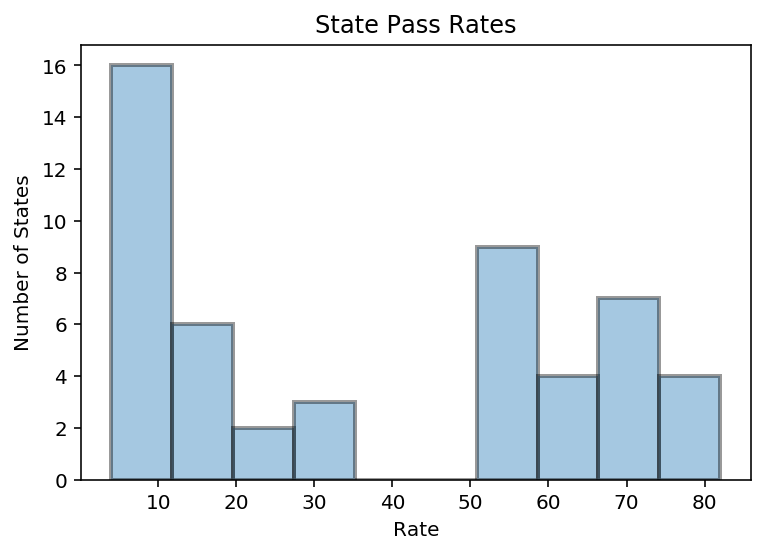

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(sat['Rate'],kde=False, bins = 10,hist_kws=dict(edgecolor="k", linewidth=2))

plt.title ('State Pass Rates')
plt.ylabel('Number of States')

/Users/zachlim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of Students')

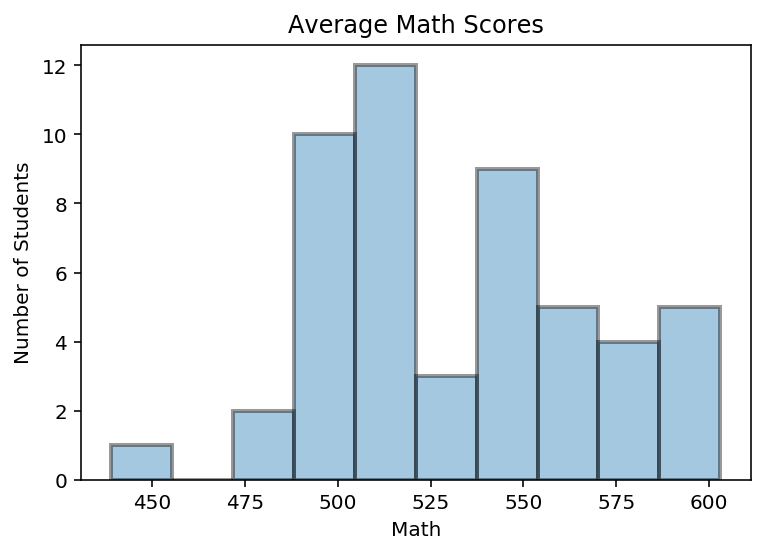

In [10]:
sns.distplot(sat['Math'],kde=False , bins = 10, hist_kws=dict(edgecolor="k", linewidth=2))

plt.title ('Average Math Scores')
plt.ylabel('Number of Students')

/Users/zachlim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of Students')

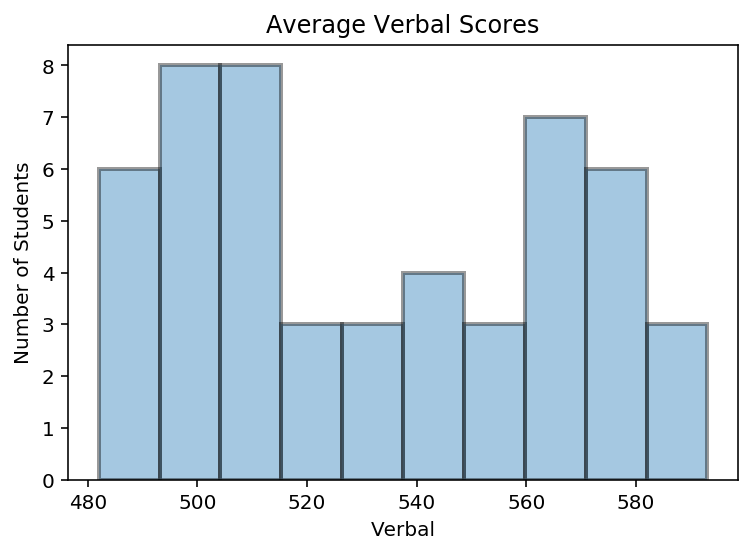

In [11]:
sns.distplot(sat['Verbal'],kde=False, bins=10, hist_kws=dict(edgecolor="k", linewidth=2))
plt.title ('Average Verbal Scores')
plt.ylabel('Number of Students')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

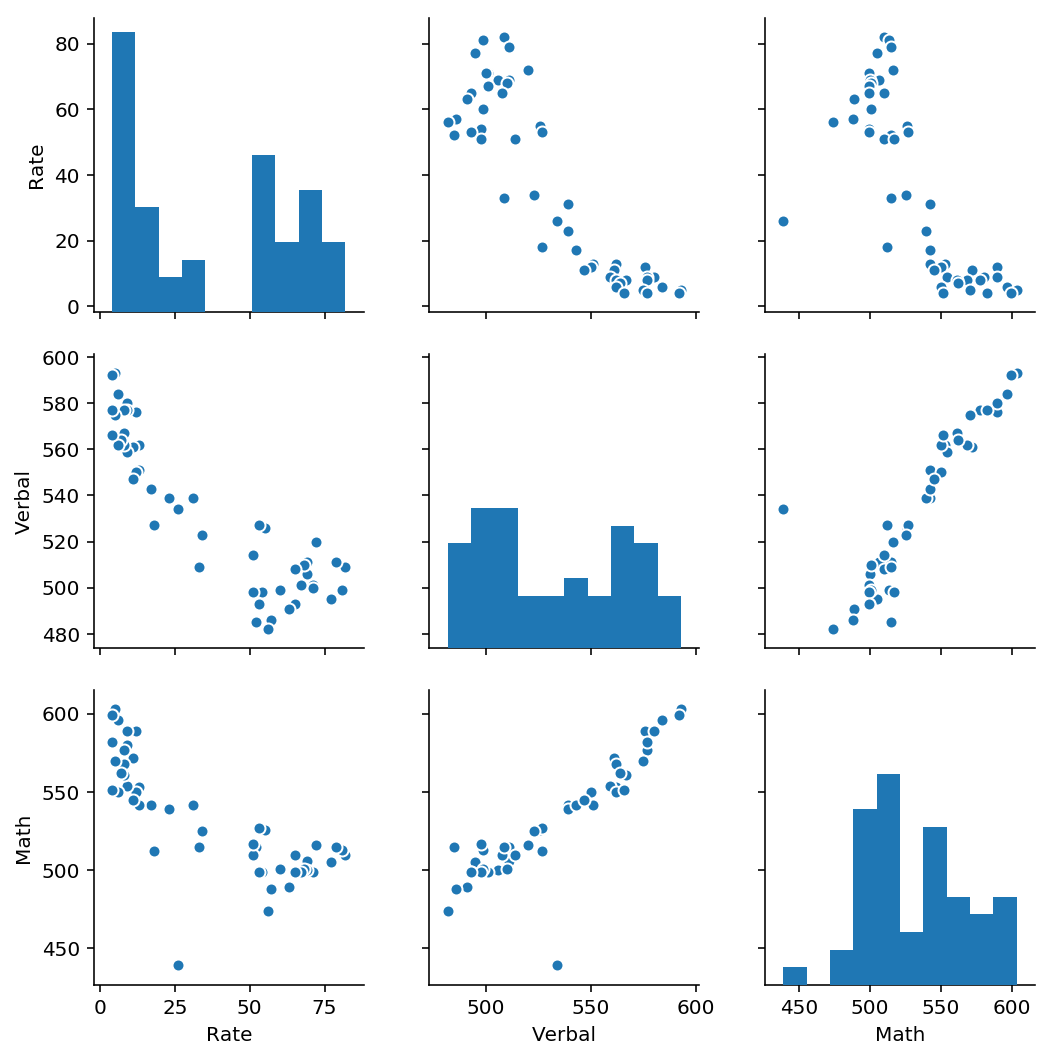

In [12]:
sns.pairplot(sat)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<Figure size 432x288 with 0 Axes>

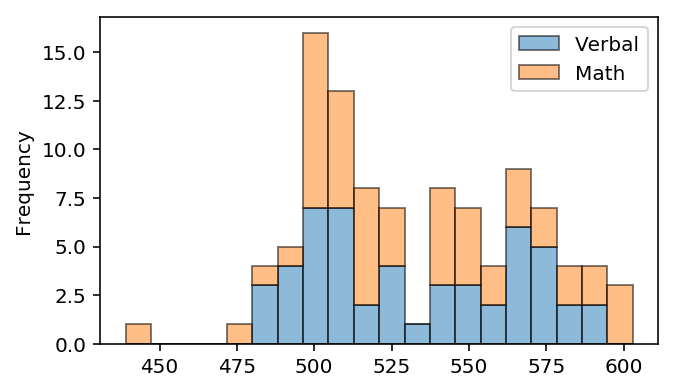

In [13]:
plt.figure()
plt.rcParams["patch.force_edgecolor"] = True
sat[['Verbal','Math']].plot.hist(stacked=True, bins=20, figsize =(5,3), alpha = 0.5)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

Ans: 

Boxplot vs Scatterplot and Histogram: 

The main advantage of using a boxplot , is that we can easily identify where the median, quartiles and range lie. Plotting 2 boxplots on the same scale side-by-side, we can compare them based on median, quartiles and range easily. Whereas on a scatterplot and histogram it is not easy to tell visually. 

Boxplot are useful in determing skewness, as we can tell where the median is in relation to the range, ie. whether the box lies closer to either whiskeror box edge. There are also "fences" on a boxplot, where we can use to identify possible outliers in the dataset. These features are not found on a histogram or scatterplot. 

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Ans: 

To make a meaningful comparison on a boxplot, we should be using features that are measuring the same quantities. 

From our example, 'Rate' is measured as an overall percentage for the state, whereas 'Math' and 'Verbal' are averages of scores. Hence , it will not be meaningful to place 'Rate' on the same boxplot as 'Verbal' and 'Math', as they are not measuring the same quantities.
        

Text(0.5,1,'Verbal vs Math')

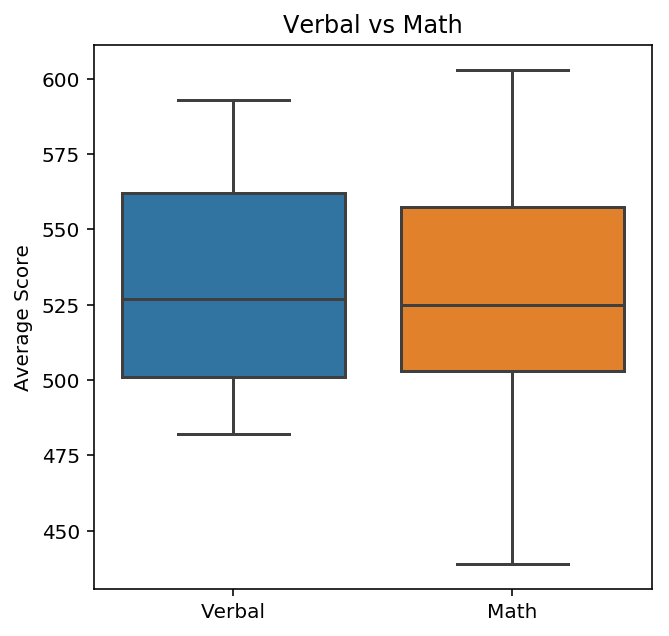

In [14]:
plt.figure(figsize = (5,5))
plt.ylabel ('Average Score')
sns.boxplot(data=sat, order =['Verbal','Math'] )
plt.title ('Verbal vs Math')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [15]:
# A:
#'Rate' is the percentage of the state's students that take the SAT. 
# To put them on the same boxplot, we should put them on the same measure, either score or percentage.
# Meaningful alternative 
# Verbal and Math section as a percentage of max score of 800. 
# Creates df1 that has the same index , but with values '/800'
# Although, they are on the same scale , NO BASIS FOR COMPARISON Though! 
# Will be better if we have number of students in each state and we can have student numbers and not just rate 

df1 = sat[['Verbal','Math']].apply(lambda x:x*100/800)
df2 = sat[['State','Rate']]
df3 = df2.join(df1)

df3.head()

,State,Rate,Verbal,Math
0,CT,82,63.625,63.750
1,NJ,81,62.375,64.125
2,MA,79,63.875,64.375
3,NY,77,61.875,63.125
4,NH,72,65.000,64.500


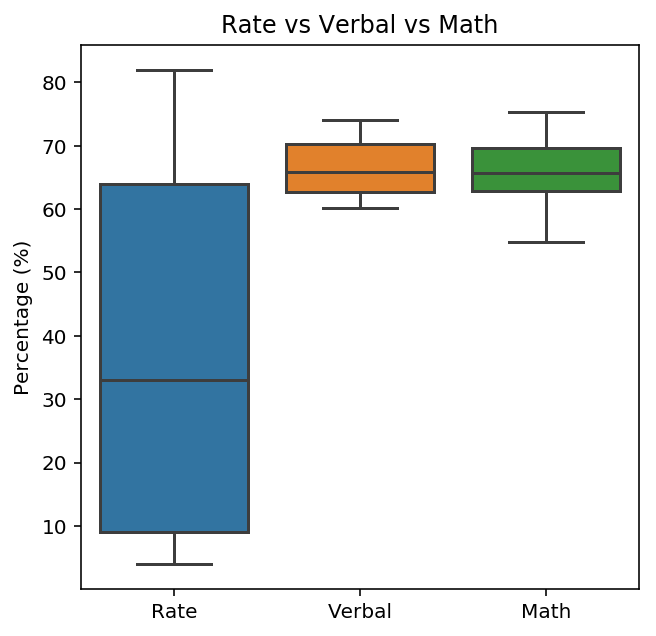

In [16]:
plt.figure(figsize = (5,5))
plt.ylabel ('Percentage (%)')
plt.title ('Rate vs Verbal vs Math')
sns.boxplot(data = df3)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
len(sat[sat['Verbal'] > sat['Verbal'].mean()])

# There are 24 states that have Verbal scores above average Verbal scores across the state. 
# Seeing there are 51 states , we have the same number of states on both sides of the average. 
# This is a feature of a normal distribution. 

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
len(sat[sat['Verbal'] > sat['Verbal'].median()]) # median = mean 

24

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
sat['Difference'] = sat['Verbal'] - sat['Math']

sat.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
# Greatest difference where Verbal > Math (Positive)
positivediff = sat.sort_values(by = 'Difference',ascending=False).head(10).reset_index()
positivediff.head(3)

,index,State,Rate,Verbal,Math,Difference
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


In [21]:
# Greatest difference where Verbal < Math (Negative)
negativediff = sat.sort_values(by = 'Difference',ascending=True).head(10).reset_index()
negativediff.head(3)

,index,State,Rate,Verbal,Math,Difference
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
sat.corr()
# correlation matrix tells us if column variable increases by value 1, what the change in value of each variable in the row will be.
# Absolute value (< 1) shows the strength of the correlation , and the sign ('+' or '-') indicates the direction


,Rate,Verbal,Math,Difference
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Difference,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
sat.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
covariance = sat.cov()
print(covariance)

              Rate       Verbal         Math  Difference
Rate        759.04  -816.280000  -773.220000  -43.060000
Verbal     -816.28  1112.934118  1089.404706   23.529412
Math       -773.22  1089.404706  1316.774902 -227.370196
Difference  -43.06    23.529412  -227.370196  250.899608


<font color = green>

### Answer:
#### 1. Covariance matrix tells the whether the relationship between variables is positive or negative (Direction). Correlation takes it a step futher and shows the degree of how variables move together (magnitude + direction), where perfectly correlated variable have magnitude 1. 

#### 2. We have to divide the covariance value by the product of standard deviations of both variables (Sx *Sy). 

#### 3.  For the SAT dataset , it is important to determine the DEGREE that a fall in particpation rate will affect the average scores. So we can use these correlation values to come up with a weighted score, and have a fairer measure between states with the higher participation and those with lower participation. 

####  For this data set ,  we can tell that for a state with smaller % of students taking the SAT, the average scores will be skewed upwards, whereas for a high participation state, the average scores will be pushed down toward the overall mean. One way this can be explained  is that for states with low particiaption , only those who are more motivated/interested to take the SATs will do so, whereas for high participation states, there are many schools that make it mandatory for all students to take the SATs.

#### Hence , studying only the covariance , a fall in participation rate for the SAT tells us,  we cannot extrapolate that if participation was 100% for all states , the states with the current highest average scores will be the same. Whereas, if a correlation value is obtained , we tell for a difference of x% participation , HOW MUCH should we adjust the values to make a fairer comparison between states.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [25]:
import pandas as pd
drug = pd.read_csv('drug-use-by-age.csv')
drug.shape

(17, 28)

In [26]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [27]:
# We want to store the data in the appropraite form 
# there are some '-' in the values that we can change them to floats(0.0). 
drug = drug.replace(['-', '0'],0.0) 
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [28]:
# Change the object dtypes to numeric for easier analysis
drug = drug.apply(pd.to_numeric, errors='ignore')
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [29]:
#Rename columns : spelling error for pain "releiver" and standardise column name format. 
drug.columns = ['age', 'n', 'alcohol_use', 'alcohol_frequency', 'marijuana_use',
       'marijuana_frequency', 'cocaine_use', 'cocaine_frequency', 'crack_use',
       'crack_frequency', 'heroin_use', 'heroin_frequency', 'hallucinogen_use',
       'hallucinogen_frequency', 'inhalant_use', 'inhalant_frequency',
       'painreliever_use', 'painreliever_frequency', 'oxycontin_use',
       'oxycontin_frequency', 'tranquilizer_use', 'tranquilizer_frequency',
       'stimulant_use', 'stimulant_frequency', 'meth_use', 'meth_frequency',
       'sedative_use', 'sedative_frequency']

In [30]:
#Set the age as index
drug.set_index('age', inplace=True)

In [31]:
drug

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [32]:
drug['n']/55628*100 
# % of respondents are not even spread amongst age groups for age groups above 25 years

age
12        5.029841
13        4.956137
14        5.019055
15        5.313871
16        5.497232
17        5.461278
18        4.438412
19        3.996189
20        4.082476
21        4.231682
22-23     8.461566
24-25     8.253038
26-29     4.724240
30-34     5.148486
35-49    13.286474
50-64     7.052204
65+       4.400662
Name: n, dtype: float64

In [33]:
# we might want to keep the age as the way it is now
# We can exclude 'n' for much of the analysis as columns are proportions and median values

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

<font color = blue>
Note: 
Data is gathered in 2012 from 55,268 respondents in 17 age (groups) on patterns of usage for 14 drugs.


# Initial overview : Questions on data

In [34]:
# Easier to see if we use 'age' as column!
# Sort by substance use between age groups
pivot_drug_use = drug.pivot_table(values =['alcohol_use','marijuana_use',
                                       'cocaine_use','crack_use','heroin_use',
                                       'hallucinogen_use','inhalant_use','painreliever_use',
                                       'oxycontin_use','tranquilizer_use','stimulant_use',
                                       'meth_use','sedative_use'],columns = 'age')

In [35]:
pivot_drug_use.head()

age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol_use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75.0,67.2,49.3
cocaine_use,0.1,0.1,0.1,0.5,1.0,2.0,3.2,4.1,4.9,4.8,4.5,4.0,3.2,2.1,1.5,0.9,0.0
crack_use,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.0
hallucinogen_use,0.2,0.6,1.6,2.1,3.4,4.8,7.0,8.6,7.4,6.3,5.2,4.5,3.2,1.8,0.6,0.3,0.1
heroin_use,0.1,0.0,0.1,0.2,0.1,0.1,0.4,0.5,0.9,0.6,1.1,0.7,0.6,0.4,0.1,0.1,0.0


In [36]:
# Alcohol is the most widely used substance (in the list) in every age group : No surprise though, considering availability. 
# But there is surprising rate of underage drinking (> 58% for 18 year olds)

In [37]:
# we want to compare median frequency as well
pivot_drug_freq = drug.pivot_table(values =['alcohol_frequency','marijuana_frequency',
                                       'cocaine_frequency','crack_frequency','heroin_frequency',
                                       'hallucinogen_frequency','inhalant_frequency','painreliever_frequency',
                                       'oxycontin_frequency','tranquilizer_frequency','stimulant_frequency',
                                       'meth_frequency','sedative_frequency'],columns = 'age')

In [38]:
pivot_drug_freq

age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol_frequency,3.0,6.0,5.0,6.0,10.0,13.0,24.0,36.0,48.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
cocaine_frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0,5.0,6.0,5.0,8.0,15.0,36.0,0.0
crack_frequency,0.0,3.0,0.0,9.5,1.0,21.0,10.0,2.0,5.0,17.0,5.0,6.0,6.0,15.0,48.0,62.0,0.0
hallucinogen_frequency,52.0,6.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,2.0,3.0,2.0,3.0,44.0,2.0
heroin_frequency,35.5,0.0,2.0,1.0,66.5,64.0,46.0,180.0,45.0,30.0,57.5,88.0,50.0,66.0,280.0,41.0,120.0
inhalant_frequency,19.0,12.0,5.0,5.5,3.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.5,10.0,13.5,0.0
marijuana_frequency,4.0,15.0,24.0,25.0,30.0,36.0,52.0,60.0,60.0,52.0,52.0,60.0,52.0,72.0,48.0,52.0,36.0
meth_frequency,0.0,5.0,24.0,10.5,36.0,48.0,12.0,105.0,12.0,2.0,46.0,21.0,30.0,54.0,104.0,30.0,0.0
oxycontin_frequency,24.5,41.0,4.5,3.0,4.0,6.0,7.0,7.5,12.0,13.5,17.5,20.0,13.5,46.0,12.0,5.0,0.0
painreliever_frequency,36.0,14.0,12.0,10.0,7.0,9.0,12.0,12.0,10.0,15.0,15.0,15.0,13.0,22.0,12.0,12.0,24.0


In [39]:
pivot_drug_freq.loc[['oxycontin_frequency',
                    'painreliever_frequency', 
                    'sedative_frequency', 
                     'stimulant_frequency',
                     'tranquilizer_frequency'], ['12','13','14','15']]

age,12,13,14,15
oxycontin_frequency,24.5,41.0,4.5,3.0
painreliever_frequency,36.0,14.0,12.0,10.0
sedative_frequency,13.0,19.0,16.5,30.0
stimulant_frequency,2.0,4.0,12.0,6.0
tranquilizer_frequency,52.0,25.5,5.0,4.5


In [40]:
# Pain Reliever and Tranquilizer median use frequency for 12 year olds are more than 2 times for teens 13-15 year olds
# Why is there such a big difference ? 

In [41]:
pivot_drug_freq.loc[['oxycontin_frequency',
                    'painreliever_frequency', 
                    'sedative_frequency', 
                     'stimulant_frequency',
                     'tranquilizer_frequency'],'65+']

oxycontin_frequency         0.0
painreliever_frequency     24.0
sedative_frequency         15.0
stimulant_frequency       364.0
tranquilizer_frequency      5.0
Name: 65+, dtype: float64

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

# Is there an underage drinking problem in America ?

** Question and deliverables**

1."Researchers suggest that teens are more likely than adults to abuse alcohol because of the way the human brain develops. During adolescence, the teenage brain’s pleasure centers mature quicker than the part of the brain responsible for sound decision-making." - 
Source : https://www.addictioncenter.com/teenage-drug-abuse/underage-drinking/

Alcohol is a big factor in fatal accidents, affecting both passengers and drivers. Car crashes are the leading cause of death for teens. About a quarter of those crashes involve a driver who is drinking underage.

Is there proof that there is a lack of enforcement of underage drinking laws in America? Or are underage drinkers able to find loopholes?

$2$.We want to identify the main reasons and players getting alcohol in hands of underage drinkers and if there is a cause for concern. 

Text(0.5,0,'Age')

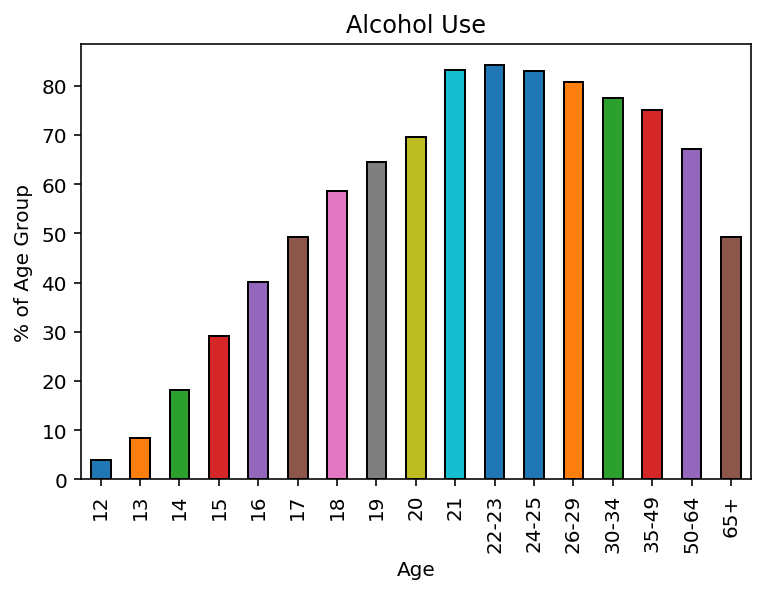

In [42]:
#3
# we can see the proportion of alcohol users in the sample 
pivot_drug_use.stack().to_frame()[0]['alcohol_use'].plot(kind='bar')
plt.title ('Alcohol Use')
plt.ylabel('% of Age Group')
plt.xlabel ('Age')

Text(0.5,0,'Age')

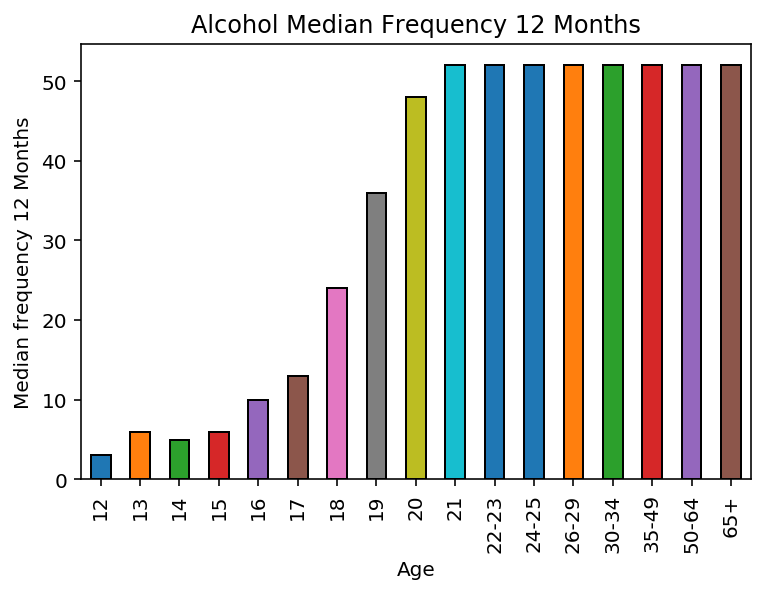

In [43]:
pivot_drug_freq.stack().to_frame()[0]['alcohol_frequency'].plot(kind='bar')
plt.title ('Alcohol Median Frequency 12 Months')
plt.ylabel('Median frequency 12 Months')
plt.xlabel ('Age')


**4 .Report** 

_Drinking age in the USA is from 21 years of age._

But we can see in the data , in 2012, a __high proportion (> 50%) of 18-20 year olds admitted to consumning alcohol.__ 
From the median frequency of alcohol consumption in the USA, we see underage drinkers at 19 have an __average of > 2 drinks a month__ even though it is technically illegal.

From this , we can infer that there is __low stigma for underage drinking__ ,as well as seemingly __lax enforcement__ of laws regarding underage drinking in 2012.

# Are we being medicating children unnecessarily?

** Question and deliverables**

1. 12 year olds are being medicated at twice the rate than 13 year olds in 2012. Begs the question why is there such a big shift in one year? Is it doctors over-prescribing? Or a push from big pharma to use certain drugtypes? 

2. We want to find evidence for the reason why there is strong takeup of some drugs for children, and a move away from others and is there overall increase in usage in 2012.


In [44]:
# 3
# check teenage median frequency for drugs considered to calm anxiety and/or ADHD
pivot_drug_freq.loc[['oxycontin_frequency',
                    'painreliever_frequency', 
                    'sedative_frequency', 
                    'stimulant_frequency',
                    'tranquilizer_frequency',
                    'marijuana_frequency'], ['12','13','14','15','16']]

age,12,13,14,15,16
oxycontin_frequency,24.5,41.0,4.5,3.0,4.0
painreliever_frequency,36.0,14.0,12.0,10.0,7.0
sedative_frequency,13.0,19.0,16.5,30.0,3.0
stimulant_frequency,2.0,4.0,12.0,6.0,9.5
tranquilizer_frequency,52.0,25.5,5.0,4.5,11.0
marijuana_frequency,4.0,15.0,24.0,25.0,30.0


In [45]:
# although there is low use % in teens , but there is high frequency for those who do. 
# likely prescribed by doctors 

drug.pivot_table(values =['marijuana_frequency',
                          'painreliever_use','oxycontin_use','tranquilizer_use',
                          'sedative_use'],columns = 'age')

age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
marijuana_frequency,4.0,15.0,24.0,25.0,30.0,36.0,52.0,60.0,60.0,52.0,52.0,60.0,52.0,72.0,48.0,52.0,36.0
oxycontin_use,0.1,0.1,0.4,0.8,1.1,1.4,1.7,1.5,1.7,1.3,1.7,1.3,1.2,0.9,0.3,0.4,0.0
painreliever_use,2.0,2.4,3.9,5.5,6.2,8.5,9.2,9.4,10.0,9.0,10.0,9.0,8.3,5.9,4.2,2.5,0.6
sedative_use,0.2,0.1,0.2,0.4,0.2,0.5,0.4,0.3,0.5,0.3,0.2,0.2,0.4,0.4,0.3,0.2,0.0
tranquilizer_use,0.2,0.3,0.9,2.0,2.4,3.5,4.9,4.2,5.4,3.9,4.4,4.3,4.2,3.6,1.9,1.4,0.2


Text(0.5,0,'Age')

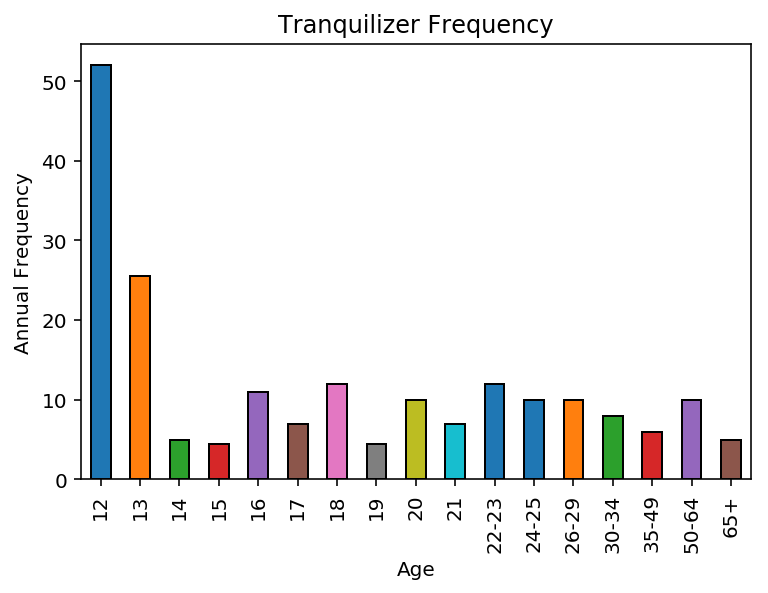

In [46]:
plt.figure()
pivot_drug_freq.stack().to_frame()[0]['tranquilizer_frequency'].plot(kind='bar')
plt.title ('Tranquilizer Frequency')
plt.ylabel('Annual Frequency')
plt.xlabel ('Age')

Text(0.5,0,'Age')

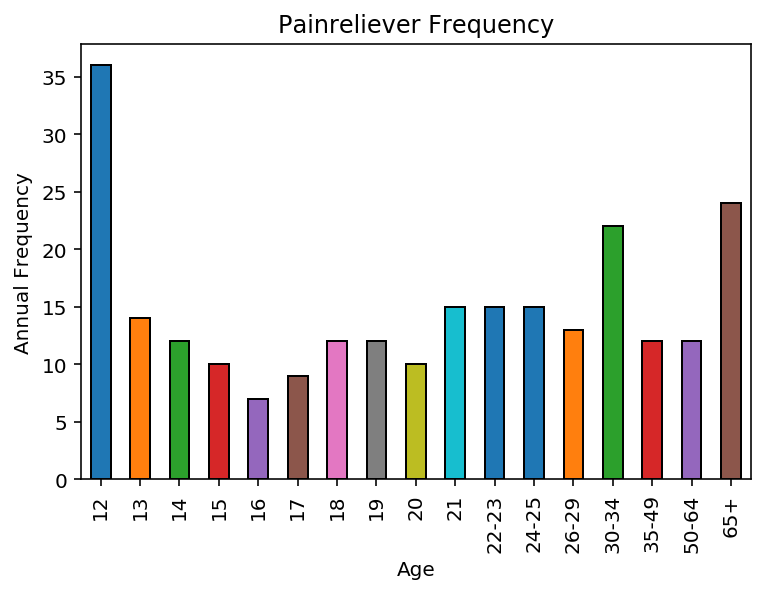

In [47]:
pivot_drug_freq.stack().to_frame()[0]['painreliever_frequency'].plot(kind='bar')
plt.title ('Painreliever Frequency')
plt.ylabel('Annual Frequency')
plt.xlabel ('Age')

Text(0.5,0,'Age')

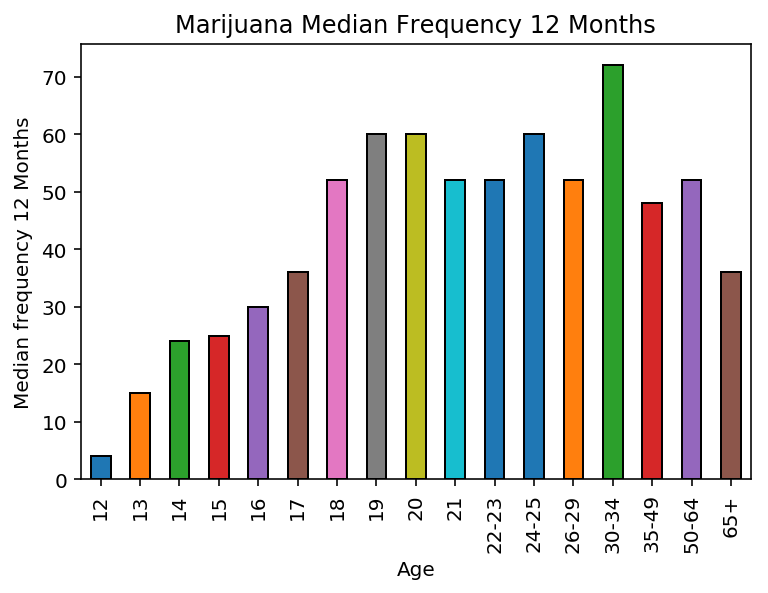

In [48]:
# Can Marijuana-based treatments be better? Low rates of usage in those groups.
pivot_drug_freq.stack().to_frame()[0]['marijuana_frequency'].plot(kind='bar')
plt.title ('Marijuana Median Frequency 12 Months')
plt.ylabel('Median frequency 12 Months')
plt.xlabel ('Age')

**4. Report**

We can see that there is strong evidence that 12 year olds prescribed tranquilizer,pain relievers are being medicated with much more than 13-16 year old using those same drugs  in the same year. 

One reason is that there might be shift from oxycontin , which is feared to be dangerously addictive as it is opioid-based. Due to this , doctors and parents might be overcompensating with higher dosages/frequencies of alternative drugs which are not as effective. 

What I infer is that there is that public opinion is a big factor is what drugs are being used to treat children. so when there is stigma attached to certain drug types, they might be avoided , even if they might have proven to be more effective in the past. 

Comparatively maybe we can explore it as an alternative medication that has been stigmatised in the past, such as marijuana

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [49]:
#1:

rate = sat['Rate']

# 2. An outlier is an observation that lies an abnomal distance from other values in a random sample
# we can consider outliers to be data points outside 1.5 std of the mean. 

upper = rate.mean()+(1.5*rate.std()) 
lower = rate.mean() - (1.5*rate.std())

print(upper)
print(lower) # we will ignore lower as rate > 0. 

rate[rate > upper]
# 3. there are 3 outliers at index 0,1,2

78.32602085853415
-4.326020858534157


0    82
1    81
2    79
Name: Rate, dtype: int64

In [50]:
median_before  = rate.median()
mean_before = rate.mean()
std_before = rate.std()

print ('BEFORE dropping the rows Median is {:.2f}, Mean is {:.2f}, Std is {:.2f}'.format(median_before,mean_before,std_before))

BEFORE dropping the rows Median is 33.00, Mean is 37.00, Std is 27.55


In [51]:
# 4. drop 3 rows

drop_after = rate.drop(rate.index[[0,1,2]])

median_after  = drop_after.median()
mean_after = drop_after.mean()
std_after = drop_after.std()

print ('AFTER dropping the outliers Median is {:.2f}, Mean is {:.2f}, Std is {:.2f}'.format(median_after,mean_after,std_after))

AFTER dropping the outliers Median is 28.50, Mean is 34.27, Std is 26.04


In [52]:
#5 . What is the difference?

median_drop = (median_before - median_after) / median_before
mean_drop = (mean_before - mean_after) / mean_before
std_drop = (std_before - std_after) / std_before

print ('AFTER dropping the outliers Median fell {:.0%}, Mean fell {:.0%}, Std fell {:.0%}'.format(median_drop,mean_drop,std_drop))


AFTER dropping the outliers Median fell 14%, Mean fell 7%, Std fell 5%


In [53]:
# When outliers are removed from dataset, we can see median fell more % than mean 
# This case is unusual , as we will expect the mean to be more affected by the outliers.
# However, when we look at the standard deviation we can see that the value is about 90% of the median
# we can conclude that the reason the median moves this way due to large spread of datapoints. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [54]:
sat.corr(method = 'spearman') # Spearman coeff is 0.909413 between Verbal and Math

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.836058,-0.811662,-0.012267
Verbal,-0.836058,1.000000,0.909413,0.042032
Math,-0.811662,0.909413,1.000000,-0.248781
Difference,-0.012267,0.042032,-0.248781,1.000000


In [55]:
#Create Ranked dataframe
ranked = sat[['State','Verbal','Math']].sort_values(by ='Verbal',ascending =False).reset_index(drop = True)

In [56]:
# Assign rank to Verbal score
ranked['VRank'] = ranked['Verbal'].rank(ascending = False)

# Assign rank to Math score
ranked['MRank'] = ranked['Math'].rank(ascending = False) 

# Notice there are scores that have ".5"when you have two identical values in the data (called a "tie") 
# We need to take the average of the ranks that they would have otherwise occupied

ranked.head(2)


,State,Verbal,Math,VRank,MRank
0,IA,593,603,1.0,1.0
1,ND,592,599,2.0,2.0


In [57]:
# As there are tied ranks , we will have to find the mean rank.

print(ranked['VRank'].mean())
print(ranked['MRank'].mean())

26.0
26.0


In [58]:
# Using formula below.
# Where n is 51
# Manual calculation 

![Formula](http://www.statisticshowto.com/wp-content/uploads/2015/01/tied-ranks-1.png)

In [59]:
top = (((ranked['VRank'] - ranked['VRank'].mean()) * (ranked['MRank'] - ranked['MRank'].mean())).sum())/51

In [60]:
bottom = (((((ranked['VRank'] - ranked['VRank'].mean())**2).sum())/51) *((((ranked['MRank'] - ranked['MRank'].mean())**2).sum())/51))**0.5

In [61]:
spearman = round(top/bottom,6)
spearman

# Matched! 

0.909413

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [62]:
# Values to check with
sat['Rate'].describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

In [63]:
from scipy import stats

sat['Percentile'] = [round(stats.percentileofscore(sat['Rate'], i , kind='mean')) for i in sat['Rate']]

sat.sample(2)

# Percentiles can be used to find the rank of a particluar value in relation to the others in the dataset
# They take into account the range of the sorted dataset values and indicates % of number of datapoints, with smaller values 
# Spearman Correlation takes into account a difference in rank for the calculation of it's formula
# if we know which percentiles of each variable in a data point (like in 'Verbal' and 'Math' ) 
# we can rank it and use it to infer the rank and calculate the Spearman rho, even if we dont know the actual values.

,State,Rate,Verbal,Math,Difference,Percentile
3,NY,77,495,505,-10,93.0
31,TN,13,562,553,9,37.0


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [64]:
#A :
#1. 
# Percentiles will be useful with dealing with outliers
# The median being the (50% percentile) and interquartile range (IQR) are a useful tools to identify extreme values
# We can define outlier as any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile

Text(0.5,0,'Age')

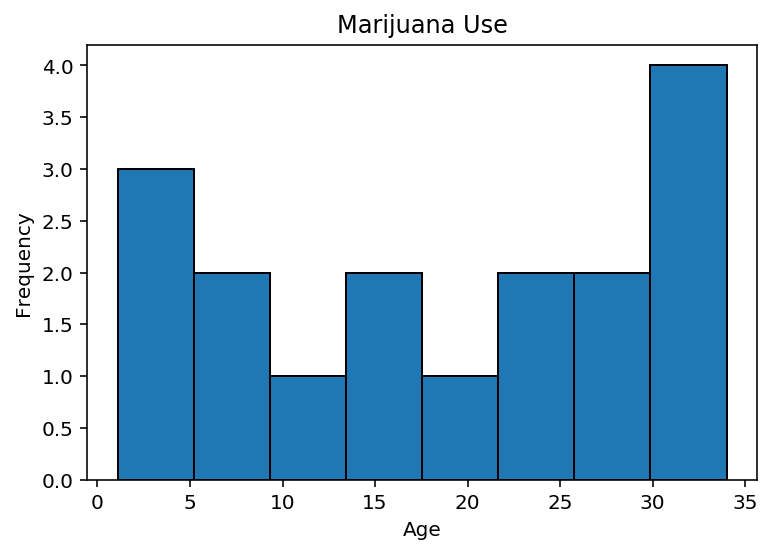

In [93]:
# 2. plot a distribution 
marijuana = drug['marijuana_use']

plt.figure()
marijuana.plot(kind='hist', bins= 8)
plt.title ('Marijuana Use')
plt.xlabel ('Age')

Text(0.5,0,'Age')

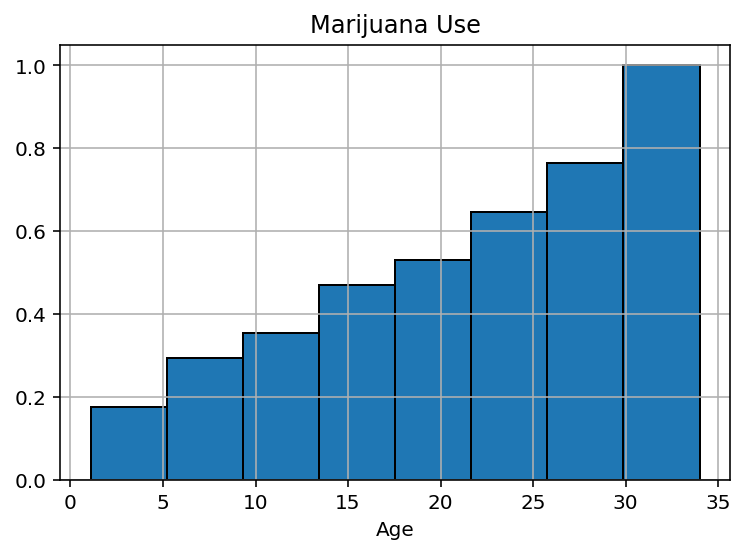

In [97]:
# 3. Plot the same variable but percentile scored.

marijuana.hist(cumulative=True, density=1, bins= 8)
plt.title ('Marijuana Use')
plt.xlabel ('Age')

# 4. Describe the effect, visually, of coverting raw scores to percentile.

The percentile graph is cumulative curve, it shows the progression of occurences in a categorical data. The frequency of its occurrence to the total sum of the frequencies of every preceding age bin, and will end at 1.0.

Visually,  the height difference of each bar is let us know how big each step size between bins. It a good way to compare the change in height to the height of the bar itself to reference the change that bin contributess to the sum of the bins before it.  